## Exploratory Data Analysis for Wine Quality

Some basic exploration of wine data for Neural Computing course!

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("winequality-white.csv")

In [3]:
inputs = df1.iloc[:, 0:11]
target = df1.iloc[:, 11]

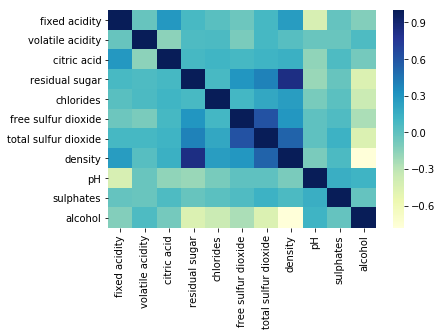

In [4]:
corr = inputs.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [54]:
def WineQuality(x):
    if x < 7 :
        return '1'
    else:
        return '2'

df1['quality'] = df1['quality'].apply(lambda x : WineQuality(x))

In [44]:
df1.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
good,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022
poor,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215


In [45]:
df1.groupby(['quality']).std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
good,0.768798,0.094097,0.080288,4.290845,0.011145,13.797146,32.724848,0.002772,0.157185,0.133044,1.255209
poor,0.860108,0.102293,0.129959,5.225048,0.023548,17.787825,44.145402,0.002894,0.148414,0.108167,1.100576


In [57]:
cols = list(df1.columns)
cols.remove('quality')
for col in cols:
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()


In [12]:
df1.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
1,0.042431,0.035325,0.018565,0.061526,0.096225,0.012303,0.085234,0.149168,-0.049138,-0.024913,-0.202379
2,-0.153633,-0.127904,-0.067220,-0.222771,-0.348407,-0.044547,-0.308611,-0.540102,0.177916,0.090204,0.732764


In [13]:
df1.groupby(['quality']).std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
1,1.019245,1.014867,1.073866,1.030163,1.077794,1.045904,1.038763,0.967671,0.982869,0.947790,0.894326
2,0.911040,0.933549,0.663430,0.845977,0.510126,0.811256,0.770031,0.926713,1.040953,1.165767,1.019981


In [14]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,1
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,1
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,1
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,1
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,1


In [27]:
df1.to_csv('wine_clean.csv', index=False)

In [58]:
melted_df = pd.melt(df1, 
                    id_vars=["quality"], # Variables to keep
                    var_name="predictor variable") # Name of melted variable
melted_df.head()

,quality,predictor variable,value
0,poor,fixed acidity,0.172079
1,poor,fixed acidity,-0.657434
2,poor,fixed acidity,1.475600
3,poor,fixed acidity,0.409083
4,poor,fixed acidity,0.409083


(-3, 4)

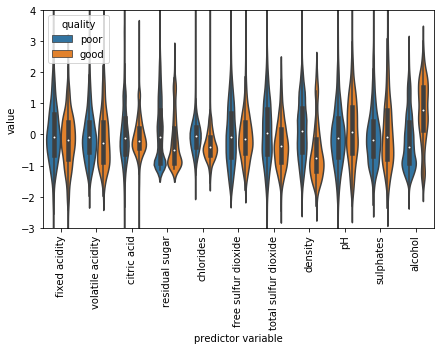

In [60]:
plt.figure(figsize=(7,4))
 
sns.violinplot(x='predictor variable', 
              y='value', 
              data=melted_df, 
              hue='quality') 

plt.xticks(rotation='vertical')
plt.ylim(-3, 4)  


In [20]:

print( melted_df.shape )


(53878, 3)
